# Experiments

Run this notebook to reproduce the experiments from the paper. 

In [1]:
import math
import gudhi
import numpy as np
import matplotlib.pyplot as plt
#from itertools import combinations
from miniball import Miniball
#from scipy.spatial import KDTree
#from pylab import rcParams

import datasets as ds
from core import alpha_core

import warnings

warnings.filterwarnings('ignore')

In [2]:
rng = np.random.default_rng(seed=0)

In [3]:
N = 20_000
M = 10_000
variance = 0.005
max_ks = [1, 10, 50, 100]

## Two circles with noise

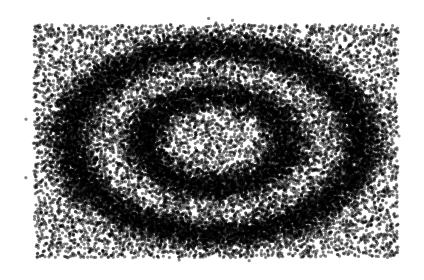

In [4]:
Z = ds.sample_double_circle(N, rng, r=0.8, variance=variance)
Y = ds.sample_rectangle(M, rng)
X = np.r_[Z, Y]

plt.scatter(*X.T, s=10, color="black", alpha=0.5, edgecolor="none")
plt.gca().axis("off")
plt.tight_layout()
plt.show()

usetex mode requires TeX.


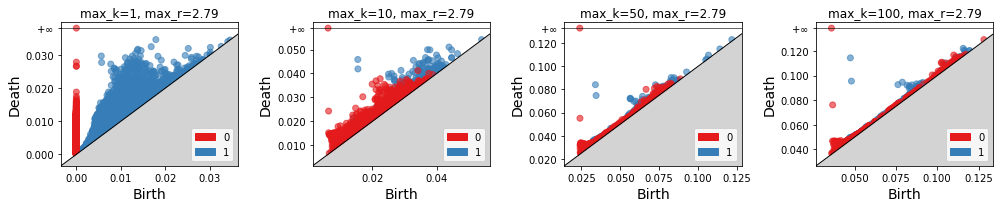

Wall time: 13 s


In [5]:
%%time
max_r = 2*math.sqrt(Miniball(X).squared_radius())

fig, axs = plt.subplots(ncols=len(max_ks), figsize=(14, 14 // len(max_ks)))
for i, max_k in enumerate(max_ks):
    st_alpha_core = alpha_core(X=X, max_k=max_k, max_r=max_r)
    gudhi.plot_persistence_diagram(st_alpha_core.persistence(), axes=axs[i], fontsize=14)
    axs[i].set_title(f"max_k={max_k}, max_r={max_r:.2f}")
    
fig.tight_layout()
plt.show()

## Unit sphere with noise

In [6]:
Z = ds.sample_unit_sphere(N, rng, variance=variance)
Y = ds.sample_cube(M, rng,lower_left_corner=(-1.1, -1.1, -1.1),upper_right_corner=(1.1, 1.1, 1.1))
X = np.r_[Z, Y]

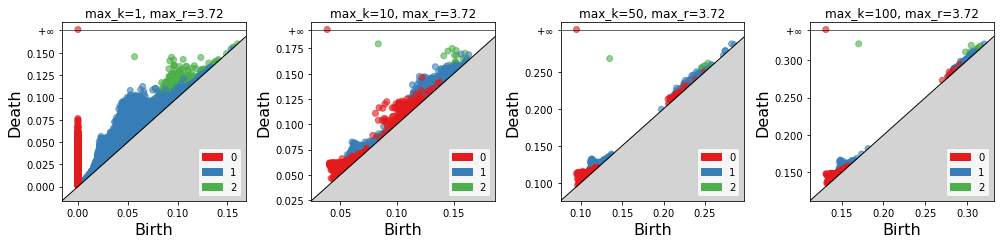

Wall time: 2min 25s


In [7]:
%%time
max_r = 2*math.sqrt(Miniball(X).squared_radius())

fig, axs = plt.subplots(ncols=len(max_ks), figsize=(14, 14 / len(max_ks)))
for i, max_k in enumerate(max_ks):
    st_alpha_core = alpha_core(X=X, max_k=max_k, max_r=None)
    gudhi.plot_persistence_diagram(st_alpha_core.persistence(), axes=axs[i])
    axs[i].set_title(f"max_k={max_k}, max_r={max_r:.2f}")
fig.tight_layout()
plt.show()

## Torus in R^3 with noise

In [8]:
Z = ds.sample_torus(N, rng, variance=variance)
Y = ds.sample_cube(M, rng, lower_left_corner=(-1, -1, -0.25), upper_right_corner=(1, 1, 0.25))
X = np.r_[Z, Y]

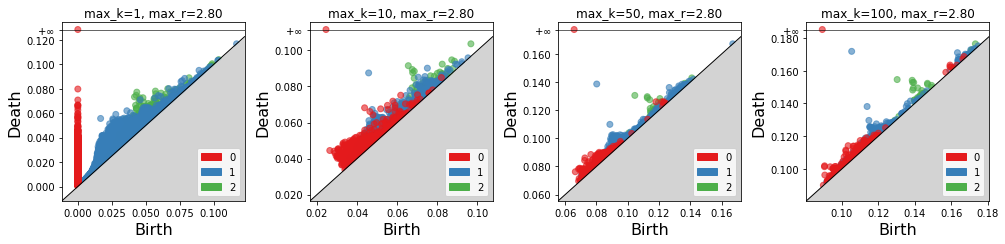

Wall time: 1min 31s


In [9]:
%%time
max_r = 2*math.sqrt(Miniball(X).squared_radius())

fig, axs = plt.subplots(ncols=len(max_ks), figsize=(14, 14 / len(max_ks)))
for i, max_k in enumerate(max_ks):
    st_alpha_core = alpha_core(X=X, max_k=max_k, max_r=None)
    gudhi.plot_persistence_diagram(st_alpha_core.persistence(), axes=axs[i])
    axs[i].set_title(f"max_k={max_k}, max_r={max_r:.2f}")
fig.tight_layout()
plt.show()

## Clifford torus in R^4 with noise 

In [10]:
Z = ds.sample_clifford_torus(N, rng, variance=variance)
Y = ds.sample_4_cube(M, rng,lower_left_corner=(-1.1, -1.1, -1.1, -1.1),upper_right_corner=(1.1, 1.1, 1.1, 1.1))
X = np.r_[Z, Y]

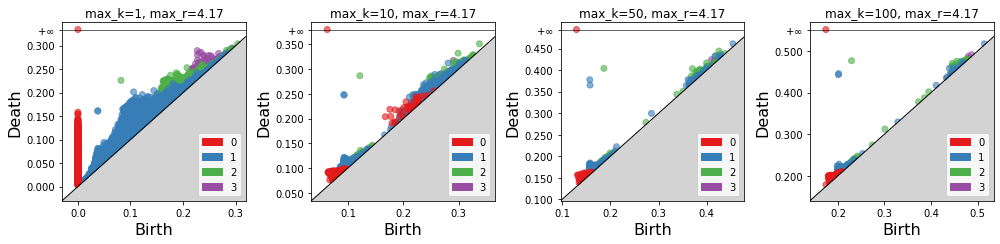

Wall time: 8min 31s


In [11]:
%%time
max_r = 2*math.sqrt(Miniball(X).squared_radius())

fig, axs = plt.subplots(ncols=len(max_ks), figsize=(14, 14 / len(max_ks)))
for i, max_k in enumerate(max_ks):
    st_alpha_core = alpha_core(X=X, max_k=max_k, max_r=None)
    gudhi.plot_persistence_diagram(st_alpha_core.persistence(), axes=axs[i])
    axs[i].set_title(f"max_k={max_k}, max_r={max_r:.2f}")
fig.tight_layout()
plt.show()